SOURCES USED :-
*  [AndrewNg's course CS229(on Youtube)](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)
*   [3Blue1Brown's playlist, Neural Network](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
*    [AndrewNg's course CNN on Coursera](https://www.coursera.org/learn/convolutional-neural-networks/home/week/1)
*    [Binary Classification using CNN](https://www.youtube.com/watch?v=jztwpsIzEGc)

In [ ]:
!unzip /content/drive/MyDrive/CNN-MLproject/celldata.zip

Streaming output truncated to the last 5000 lines.
  inflating: celldata/5/61954.png    
  inflating: __MACOSX/celldata/5/._61954.png  
  inflating: celldata/5/59213.png    
  inflating: __MACOSX/celldata/5/._59213.png  
  inflating: celldata/5/60486.png    
  inflating: __MACOSX/celldata/5/._60486.png  
  inflating: celldata/5/61940.png    
  inflating: __MACOSX/celldata/5/._61940.png  
  inflating: celldata/5/61798.png    
  inflating: __MACOSX/celldata/5/._61798.png  
  inflating: celldata/5/59207.png    
  inflating: __MACOSX/celldata/5/._59207.png  
  inflating: celldata/5/62291.png    
  inflating: __MACOSX/celldata/5/._62291.png  
  inflating: celldata/5/59561.png    
  inflating: __MACOSX/celldata/5/._59561.png  
  inflating: celldata/5/59549.png    
  inflating: __MACOSX/celldata/5/._59549.png  
  inflating: celldata/5/58657.png    
  inflating: __MACOSX/celldata/5/._58657.png  
  inflating: celldata/5/61968.png    
  inflating: __MACOSX/celldata/5/._61968.png  
  inflating: c

I HAVE A FOLDER NAMED celldata. INSIDE IT THERE ARE 6 FOLDERS FORM 1 TO 6 WITH EACH CELL TYPES AND A cells FOLDER WITH ALL THE CELLS. ALSO THERE IS label.csv FILE.

THIS IS THE CODE THAT I USED TO SEGREGATE MY FILE INTO 6 FOLDERS.

```
import pandas as pd
import numpy as np
import os
os.chdir('/Users/parthajit/Desktop/CODING/CNN/celldata/')
read = pd.read_csv("label.csv", index_col=0)
for item in os.listdir('cells'):
    source_destination = 'cells/' + item
    final_destination = str(read.loc[item]['label']) + '/' + item
    os.replace(source_destination,final_destination)
```



[LINK FOR CELL.ZIP FILE](https://drive.google.com/file/d/1jT6Ovcm_qEMSVUMM2KZInLdcqF-8Q-pr/view?usp=sharing)

MULTICLASSIFICATION OF CELL IMAGES

TL TASK

PARTH KANSAGRA

In [ ]:
%cd celldata/

/content/celldata


1.WHAT TO DO :- 6 TYPES OF CELL IMAGES ARE GIVEN. I HAVE TO MAKE A MODEL THATTRAINS ITSELF ON THESE IMAGES AND THEN WHEN GIVEN A RANDOM NEW IMAGE ITIDENTIFIES WHICH CELL TYPE , NUMBER BETWEEN 1 TO 6, IT IS.

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score
import numpy as np
from tensorflow.keras.models import load_model

2.TAKING INPUT :- I USED GOOGLE COLLAB FOR IT. CONVERTED THE CELL DATA FILEINTO A ZIP FILE, UPLOADED IT ON GOOGLE DRIVE, MOUNTED THE DRIVE TO GOOGLECOLLAB AND UNZIPPED IT USING !UNZIP COMMAND .IMPORTED THE NECESSARYLIBRARIES AND MODULES . SEARCHED ON GOOGLE WHAT LIBRARIES DO MOST PEOPLEMAKING CNN MODELS IMPORT. THEN GOT TO KNOW ABOUT KERAS.

In [ ]:
!pwd

/content/celldata


3.CREATING THE DATASET :- I WANT TO TAKE INPUT SUCH THAT EACH OF THE IMAGE ISASSIGNED ITS OWN GIVEN TRUE LABEL. THEN TO MAKE IT A BIT EASIER I SEARCHEDFOR PRE EXISTING CNN MODELS . I GOT TO KNOW THERE ARE MANY WAYS TO TAKE THEINPUT. THE WAY YOU TAKE THE INPUT DATASET VARIES ALONGSIDE HOW YOU TRAINTHE MODEL. GOT TO KNOW ABOUT VERY TECHNICAL LOOKING 6-7 LINES OF CODE THATTAKES THE INPUT FROM THE CELL IMAGE FILE AND SIMULTANEOULSY TAKES THE LABELVALUE FROM THE .CSV FILE. BUT UNABLE TO WRAP MY MIND AROUND IT AS ABEGINEER I FOLLOWED PLAN B. I GOT TO KNOW ABOUTIMAGE_DATASET_FROM_DIRECTORY FUNCTION WHICH WHEN GIVEN INPUT OF A DIRECTORYWITH 6 FILES CONTAINING THE 6 DIFFERENT TYPES OF CELL TYPES WOULD DIRECTORYSTORE THE IMAGE NAME AND ITS LABEL. WE STORE THIS IN A VARIABLE AND PASSTHAT VARIABLE TO MODEL.FIT FUNCTION.

In [ ]:
!mkdir cellimages

4.CREATING 6 FILES :- WITH THE HELP OF MY FRIENDS I WROTE A CODE IN PYTHONTHAT WOULD READ EVERY FILE IN CELL FOLDER AND READ ITS LABEL IN THE .CSVFILE AND ACCORDING TO ITS LABEL TRANSFER IT TO THAT PARTICULAR FOLDER. USEDSOURCE DESTINATION , FINAL DESTINATION AND A FOR LOOP TO EXECUTE THEPROCESS. THIS CREATED 6 FOLDERS NAMED 1 TO 6 WITH RESPECTIVE CELL IMAGES.

In [ ]:
!mv 1 2 3 4 5 6 cellimages

In [ ]:
train = tf.keras.utils.image_dataset_from_directory('cellimages', batch_size=32, color_mode='grayscale', image_size= (64,64))
train = train.map(lambda x,y:(x/255,y))

Found 63445 files belonging to 6 classes.


5.DIVIDING INTO TRAIN,VALIDATE,TEST DATA:- USED MAP FUNCTION TO NORMALIZE THEIMAGE SIZE AND THEN DIVIDED THE INPUT DATA SET INTO 3 PARTS USING TAKEFUNCTION. THE WAY I TAKE INPUT IS IN FORM OF BATCHES OF 32. AFTER THIS IJUST COPIED A CODE FOM THE NET TO PRINT 20 OF THOSE IAMGES TO ENSURE THEYARE RANDOM.

In [ ]:
sizeoftrain = int(0.7*len(train))
sizeofval = int(0.1*len(train))
sizeoftest = int(0.2*len(train))

train = train.take(sizeoftrain)
validationdata = train.take(sizeofval)
testingdata = train.take(sizeoftest)

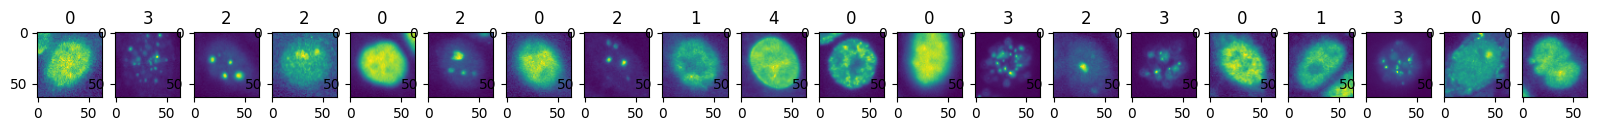

In [ ]:
data_iterator = train.as_numpy_iterator()



batch = data_iterator.next()

fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

6.CREATING MODEL :- USED SEQUENTIAL MODEL. USED LAYERS TO ADD DIFFERENTLAYERS OF THE MODEL.I SEARCHED ON GOOGLE HOW TO MAKE A MODEL . THERE I GOTSTACKOVERFLOW ANSWERS OF PEOPLE DISCUSSING ABOUT OTHER STUFF BUT I GOT TOKNOW HOW TO ACTUALLY MAKE THE MODEL. WITH A NORMAL ASSUMPTION I ADDED FEWLAYERS TO IT. AT THIS POINT I DIDN'T KNOW HOW TO PROCEED FURTHER AND WAS ABIT CONFUSE. SO I WATCHED SOME YOUTUBE VIDEOS OF PEOPLE EXPLAINING NEURALSNETWORKS AND HOW THEY WORK. FROM THESE I GOT TO KNOW ABOUT THE MEANING OFTERMS LIKE CONV2D AND MAXPOOLING AND WHATS THEIR PURPOSE( ATLEAST TO SOMEEXTENT).

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

7.WHAT DO ALL THESE TERMS MEAN :- AT THIS POINT AFTER SEEING SO MANY ALREADYBUILT MODELS ON THE NET I KNEW NOW I WOULD COMPILE AND TRAIN THE MODEL. NOW IJUST HAD TO KNOW THE MEANING OF ALL THESE TERMS LIKE ACTIVATION,OPTIMIZER,YADA YADA. I GOT TO KNOW WHAT IS ACTIVATION FUNCTION , WHY RELU ISUSED NOWADAYS OVER SIGMOID ,WHAT IS CATEGORICAL CROSS ENTROPY ETC.STILLCONFUSED ABOUT SOME TERMS BUT YEAH I HAVE A BASIC UNDERLYING IDEA OF WHAT ISHAPPENING IN THE CODE.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 18432)             0

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

8. TRAIN AND PLOT GRAPHS :- LOOKING AT THE CNN MODELS ON THE NET , I KINDAKNEW WHAT TO DO NEXT. USE MODEL.FIT TO TRAIN IT. COPIED THE CODE OF HOW TOPLOT THE GRAPH FROM THE DIFFERENT MODELS I SAW ONLINE AND ALSO ASKED CHATGPTTO KINDA CORRECT ANY ERROR IN THE CODE.AGAIN SEARCHED HOW TO PRINT ACCURACYAND LOSS AND FOUND A CODE FOR THAT. THEN TESTED IT ON A RANDOM IMAGE .ALTHOUGHI WAS COPYING MOST OF THE CODE FORM DIFFERENT PARTS OF INTERNET , SLOWLY ISTARTED BECOMING COMFORTABLE WITH CODE. I STARTED GETTING AN IDEA OF WHAT ISHAPPENING AND SOMETIMES EVEN MODIFIED THE COPIED CODE TO FIT MY MODEL.EARLIERI WAS GOOGLING STUFF WITHOUT ANY KNOWLEDGE. NOW SLOWLY I STARTED GOOGLINGTHOSE THINGS WHICH I NEED INSTEAD OF JUST GOING OVER DIFFERENT MODELS ANDCOPYING CODE THAT WORKS.

In [ ]:
hist = model.fit(train, epochs=10, validation_data=validationdata, callbacks=[tensorboard_callback])


Epoch 1/10
1388/1388 [==============================] - 31s 15ms/step - loss: 0.7261 - accuracy: 0.7203 - val_loss: 0.5368 - val_accuracy: 0.8106
Epoch 2/10
1388/1388 [==============================] - 18s 13ms/step - loss: 0.4522 - accuracy: 0.8328 - val_loss: 0.4214 - val_accuracy: 0.8395
Epoch 3/10
1388/1388 [==============================] - 16s 11ms/step - loss: 0.3616 - accuracy: 0.8663 - val_loss: 0.3473 - val_accuracy: 0.8728
Epoch 4/10
1388/1388 [==============================] - 16s 11ms/step - loss: 0.3051 - accuracy: 0.8888 - val_loss: 0.2859 - val_accuracy: 0.8960
Epoch 5/10
1388/1388 [==============================] - 23s 16ms/step - loss: 0.2624 - accuracy: 0.9042 - val_loss: 0.2399 - val_accuracy: 0.9118
Epoch 6/10
1388/1388 [==============================] - 17s 12ms/step - loss: 0.2287 - accuracy: 0.9176 - val_loss: 0.2163 - val_accuracy: 0.9212
Epoch 7/10
1388/1388 [==============================] - 16s 11ms/step - loss: 0.1944 - accuracy: 0.9291 - val_loss: 0.2119 -

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


9. EVALUATING THE MODEL :- NOW THE LAST PART WAS KINDA EASY. SEARCH HOW TOPRINT THE STUFF I NEED TO AND FINDING A CODE THAT WORKS. I HAD ALREADY PRINTEDTHE ACCURACY AND PLOTTED THE GRAPH. ONE THING THAT TROUBLED MY BRAIN WAS F1SCORE. I REALIZED THE THING THAT THERE ARE MULTIPLE WAYS TO PRINTS THESE DATASBUT I HAVE TO FIND THAT WAY WHICH FITS IN THE WAY I HAD TAKEN INPUT DATA. THISWAS MOSTLY TAKING HELP OF GOOGLE AND DOING TRIAL AND ERROR TILL MY CODESNIPPETS STOPS GIVING ERROR.

In [ ]:
#new_model = load_model('models/imageclassifier.h5')

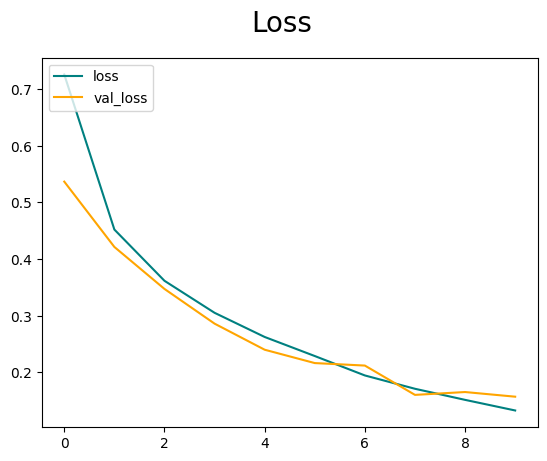

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

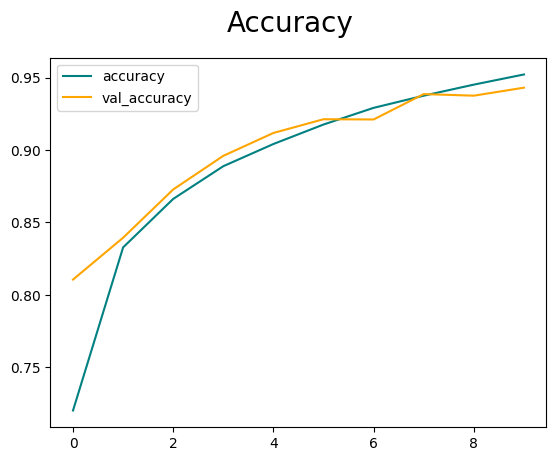

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
%cd celldata

[Errno 2] No such file or directory: 'celldata'
/content/celldata


In [ ]:
testingdata = testingdata.map(lambda x, y: (tf.image.resize(x, (64, 64)), y))
testingdata_loss, testingdata_accuracy = model.evaluate(testingdata)
print('Test Loss:', testingdata_loss)
print('Test Accuracy:', testingdata_accuracy)


396/396 [==============================] - 5s 13ms/step - loss: 0.1463 - accuracy: 0.9471
Test Loss: 0.1462571620941162
Test Accuracy: 0.9471275210380554


10. FINE TUNING :- "FINE TUNING" IS KINDA OVER EXAGERRATING. NOW ITS JUSTCHANGING THE VARIABLES LIKE FILTERS , IMAGE SIZE, NUMBER OF EPOCHS , FINDINGQUICKER WAY TO DO SOME PART OF THE PROCESS IF IT EXISTS SO THAT I GET MAXACCURACY. ONE THING I LEARNT FROM ONE OF MY FRIEND WAS THAT BECAUSE THE CELLIMAGES HAVE BASICALLY TWO COLORS , BLACK AND WHITE, INSTEAD OF KEEPING THEIMAGES IN RGB STATE I CAN CONVERT THEM INTO GREYSCALE , WHICH WOULD CONVERT MYMODEL LAYERS FROM 3D TO KINDA 1D(THIS IS WHAT I MADE OF IT). THIS WOULD SPEEDUP THE TRAINING PROCESS A BIT . USED CV LIBRARY TO DO THIS.

In [ ]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
#model = tf.keras.models.load_model('models/imageclassifier.h5')

In [ ]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[Precision(), Recall()])

In [ ]:
pre = Precision()
re = Recall()

In [ ]:
for x, y in testingdata.as_numpy_iterator():

    yhat = model.predict(x)
    pre.update_state(y, np.argmax(yhat,axis=1)+1)
    re.update_state(y, np.argmax(yhat,axis=1)+1)


1/1 [==============================] - 0s 17ms/step


FOR PRINTING F1 SCORE, WE WILL CALCULATE RECALL AND PRESICION AND THEN APPLY HARMONIC MEAN FORMULAE TO CALCULATE F1 SCORE.

In [ ]:
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
f1 = 2 * (precision_value * recall_value) / (precision_value + recall_value)



In [ ]:
print("Precision:", precision_value)
print("Recall:", recall_value)
print("F1 Score:", f1)


Precision: 0.7691761
Recall: 1.0
F1 Score: 0.8695303021880375
